# Netflix Data Analysis Project

note: This data project has been used as a take-home assignment in the recruitment process for the data science positions at Netflix.

## Assignment

1. What countries have the most content?
2. How has the number of movies released per year changed over the last 30 years?
3. Comparison of tv shows vs. movies.
4. How many TV shows are released by month?
5. Analysis of actors of different types of shows/movies.
6. Does Netflix has more focus on TV Shows than movies in recent years?
7. Understanding what content is available in different countries.

In [17]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load and review dataset

df = pd.read_csv(r"C:\Users\Hope\OneDrive\Desktop\Netflix Data Analysis\netflix_data.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 1. What countries have the most content?

In [12]:
# Count the frequency of each country of Netflix content
country_counts = df['country'].value_counts().head(10)  # Top 10 countries

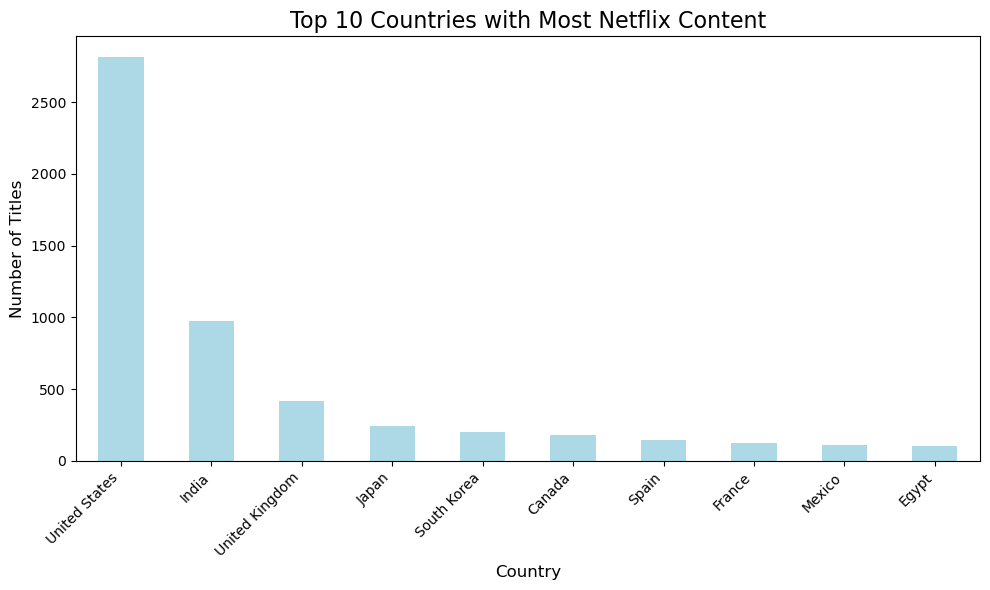

In [14]:
# Create bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='#ADD8E6')
plt.title('Top 10 Countries with Most Netflix Content', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2. How has the number of movies released per year changed over the last 30 years?

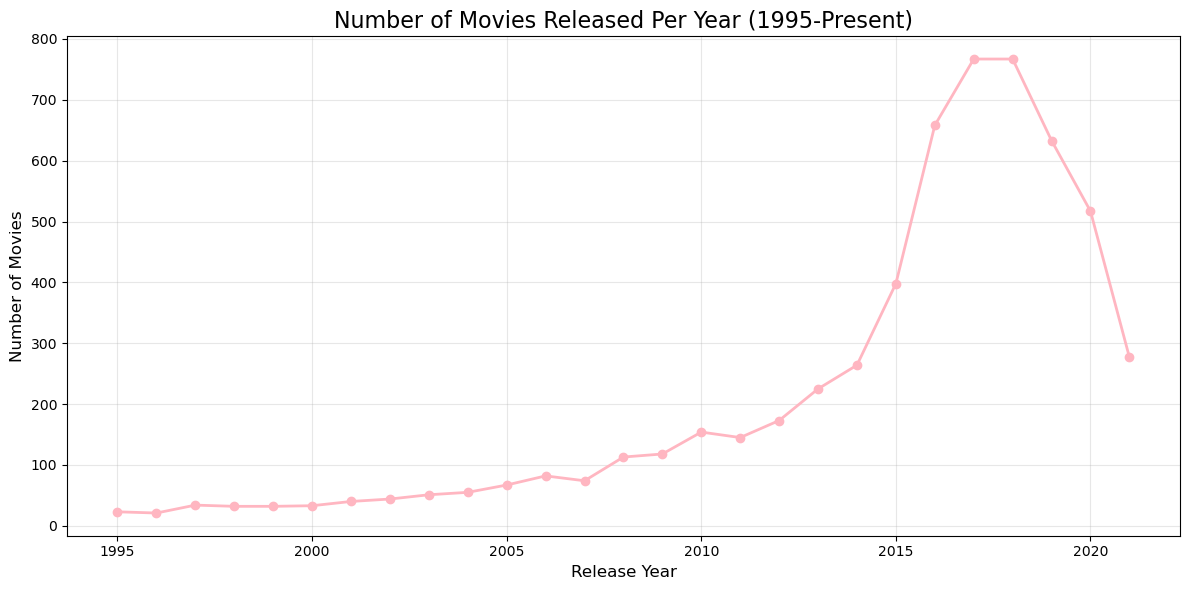

In [15]:
# Calculate: Filter for movies and count by release year
movies = df[df['type'] == 'Movie']
movies_per_year = movies['release_year'].value_counts().sort_index()

# Filter to only show 1995 onwards
movies_per_year = movies_per_year[movies_per_year.index >= 1995]

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linewidth=2, color='#FFB6C1')
plt.title('Number of Movies Released Per Year (1995-Present)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3. Comparison of tv shows vs. movies.

In [5]:
# Count the occurrences of each category type of movie and tv show
type_counts = df['type'].value_counts()

print("Counts:")
print(type_counts)

Counts:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


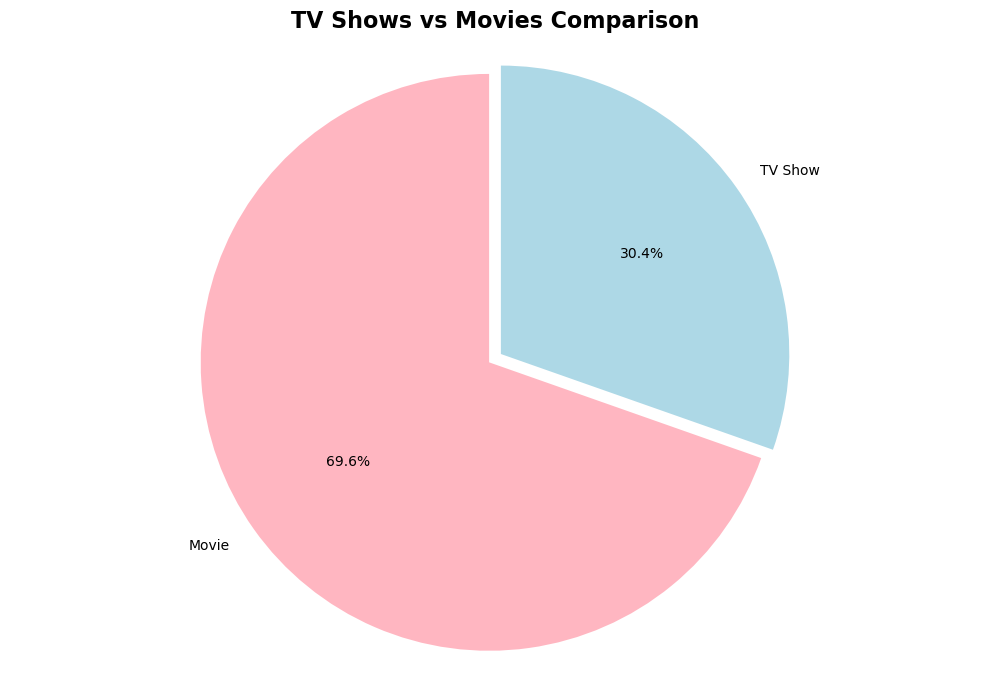

In [16]:
# Create pie chart
plt.figure(figsize=(10, 7))
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['#FFB6C1', '#ADD8E6'], explode=(0.05, 0))

plt.title('TV Shows vs Movies Comparison', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

### 4. How many TV shows are released by month?

In [21]:
# Filter to only TV Shows
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [22]:
# Extract month from the date column (adjust 'date_added' to your actual column name)
# Strip whitespace and convert to datetime
tv_shows_df['month'] = pd.to_datetime(tv_shows_df['date_added'].str.strip(), errors='coerce').dt.month

In [23]:
# Count TV shows by month
monthly_counts = tv_shows_df['month'].value_counts().sort_index()

In [24]:
# Create month labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [26]:
# Ensure all 12 months are represented (fill missing months with 0)
counts = [monthly_counts.get(i, 0) for i in range(1, 13)]

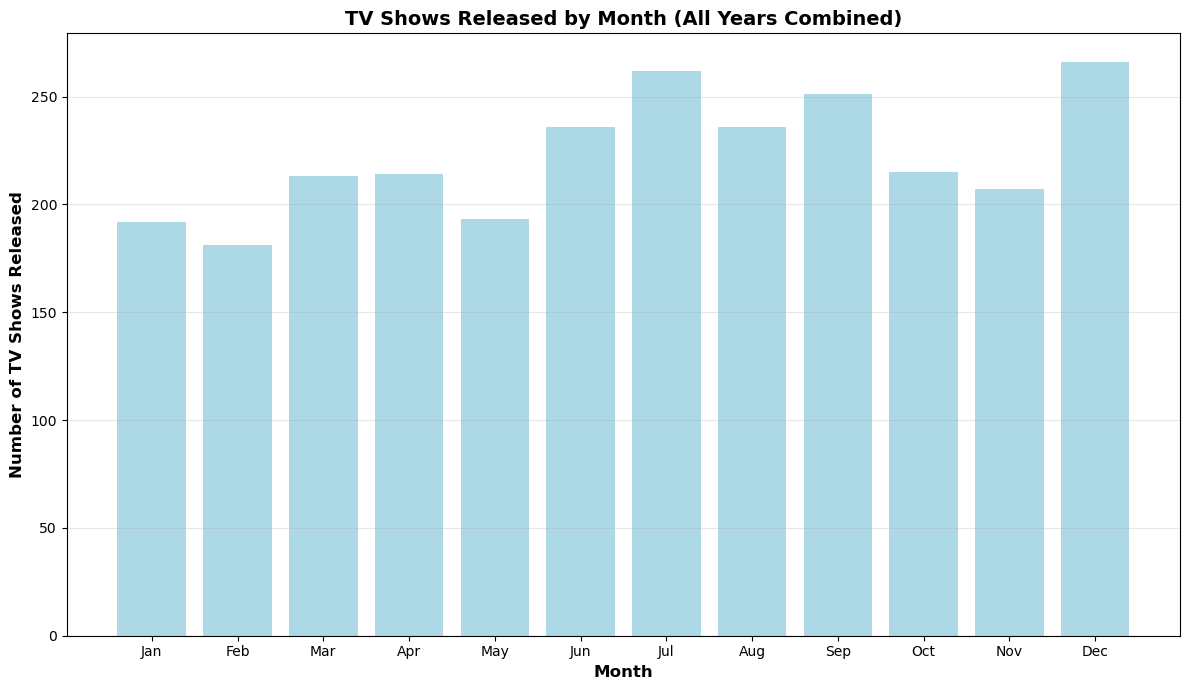

In [30]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.bar(months, counts, color='#ADD8E6', linewidth=0.7)
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of TV Shows Released', fontsize=12, fontweight='bold')
ax.set_title('TV Shows Released by Month (All Years Combined)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 5. Analysis of actors of different types of shows/movies.

In [31]:
# Split the cast column and explode to get individual actors
all_actors = df['cast'].dropna().str.split(', ').explode()

In [32]:
# Strip whitespace from actor names
all_actors = all_actors.str.strip()

In [33]:
# Count appearances and get top 10
top_10_actors = all_actors.value_counts().head(10)

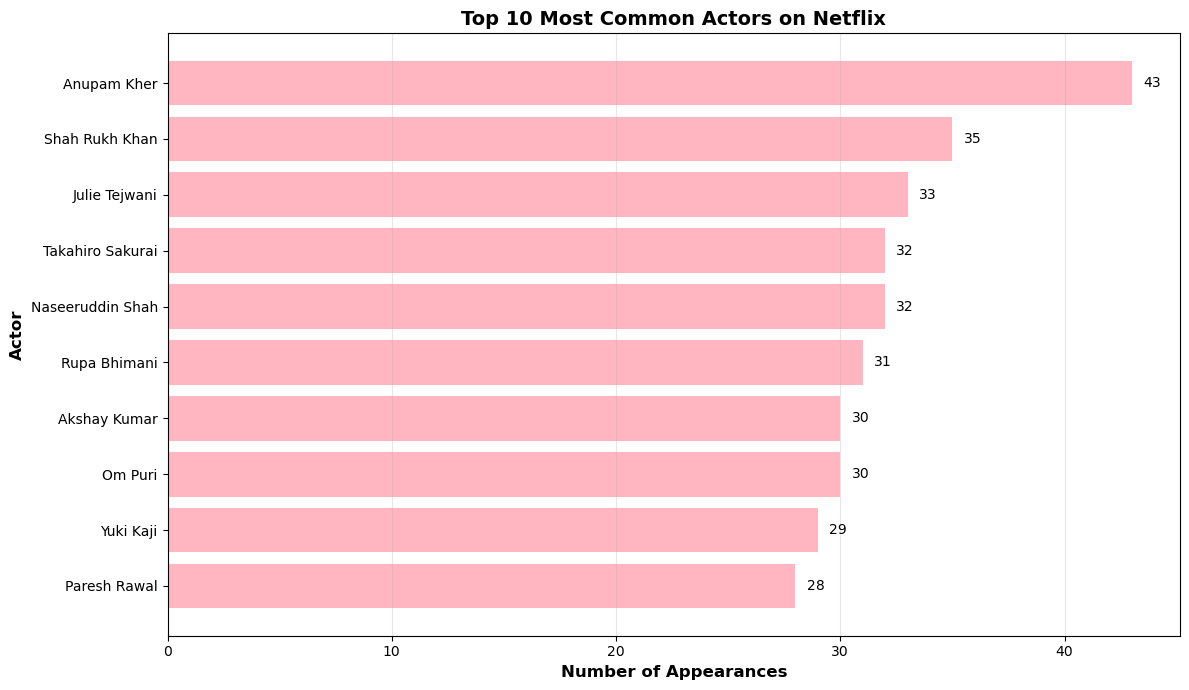

In [35]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(top_10_actors.index, top_10_actors.values, color='#FFB6C1', linewidth=0.7)
ax.set_xlabel('Number of Appearances', fontsize=12, fontweight='bold')
ax.set_ylabel('Actor', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Most Common Actors on Netflix', fontsize=14, fontweight='bold')
ax.invert_yaxis()  # Highest count at the top
ax.grid(axis='x', alpha=0.3)
for i, (actor, count) in enumerate(top_10_actors.items()):
    ax.text(count + 0.5, i, str(count), va='center', fontsize=10)
plt.tight_layout()
plt.show()

### 6. Does Netflix has more focus on TV Shows than movies in recent years?

In [36]:
# Convert date column to datetime
df['date_parsed'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

In [37]:
# Extract year
df['year'] = df['date_parsed'].dt.year

In [38]:
# Filter for 2010 onwards
df_filtered = df[df['year'] >= 2010].copy()

In [39]:
# Group by year and type, then count
yearly_counts = df_filtered.groupby(['year', 'type']).size().unstack(fill_value=0)

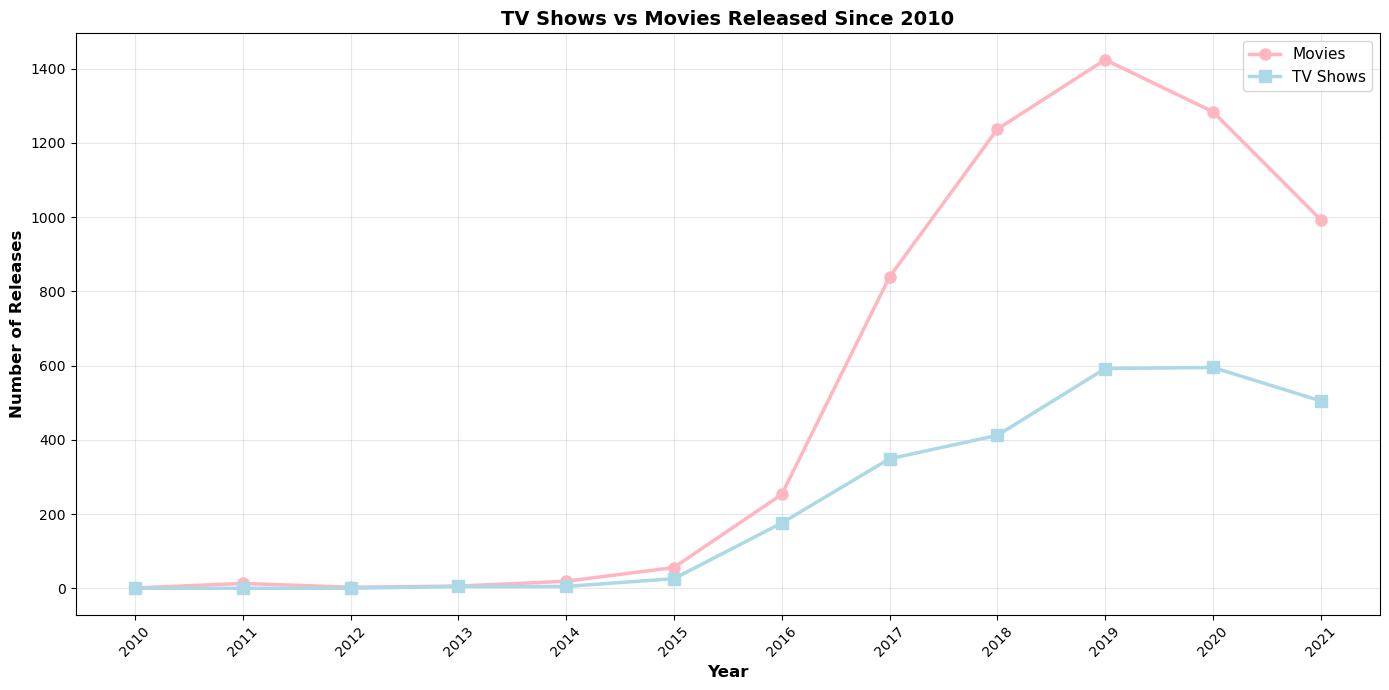

In [41]:
# Create the line chart
fig, ax = plt.subplots(figsize=(14, 7))
if 'Movie' in yearly_counts.columns:
    ax.plot(yearly_counts.index, yearly_counts['Movie'], marker='o', linewidth=2.5, 
            label='Movies', color='#FFB6C1', markersize=8)
if 'TV Show' in yearly_counts.columns:
    ax.plot(yearly_counts.index, yearly_counts['TV Show'], marker='s', linewidth=2.5, 
            label='TV Shows', color='#ADD8E6', markersize=8)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Releases', fontsize=12, fontweight='bold')
ax.set_title('TV Shows vs Movies Released Since 2010', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xticks(yearly_counts.index)
ax.set_xticklabels([int(year) for year in yearly_counts.index], rotation=45)
plt.tight_layout()
plt.show()

### 7. Understanding what content is available in different countries.

In [42]:
# Get the country column and split if multiple countrie
# Some entries have multiple countries separated by commas
all_countries = df['country'].dropna().str.split(', ').explode()
all_countries = all_countries.str.strip()

In [43]:
# Create a temporary dataframe with country and type
country_type_df = df[['country', 'type']].copy()
country_type_df = country_type_df.dropna(subset=['country'])

In [44]:
# Split countries and explode to handle multiple countries per entry
country_type_df['country'] = country_type_df['country'].str.split(', ')
country_type_df = country_type_df.explode('country')
country_type_df['country'] = country_type_df['country'].str.strip()

In [45]:
# Get top 5 countries by total count
top_5_countries = country_type_df['country'].value_counts().head(5).index

In [46]:
# Filter to only top 5 countries
top_countries_df = country_type_df[country_type_df['country'].isin(top_5_countries)]

In [47]:
# Group by country and type
country_type_counts = top_countries_df.groupby(['country', 'type']).size().unstack(fill_value=0)

In [49]:
# Reorder by total count (descending)
country_type_counts['total'] = country_type_counts.sum(axis=1)
country_type_counts = country_type_counts.sort_values('total', ascending=False).drop('total', axis=1)

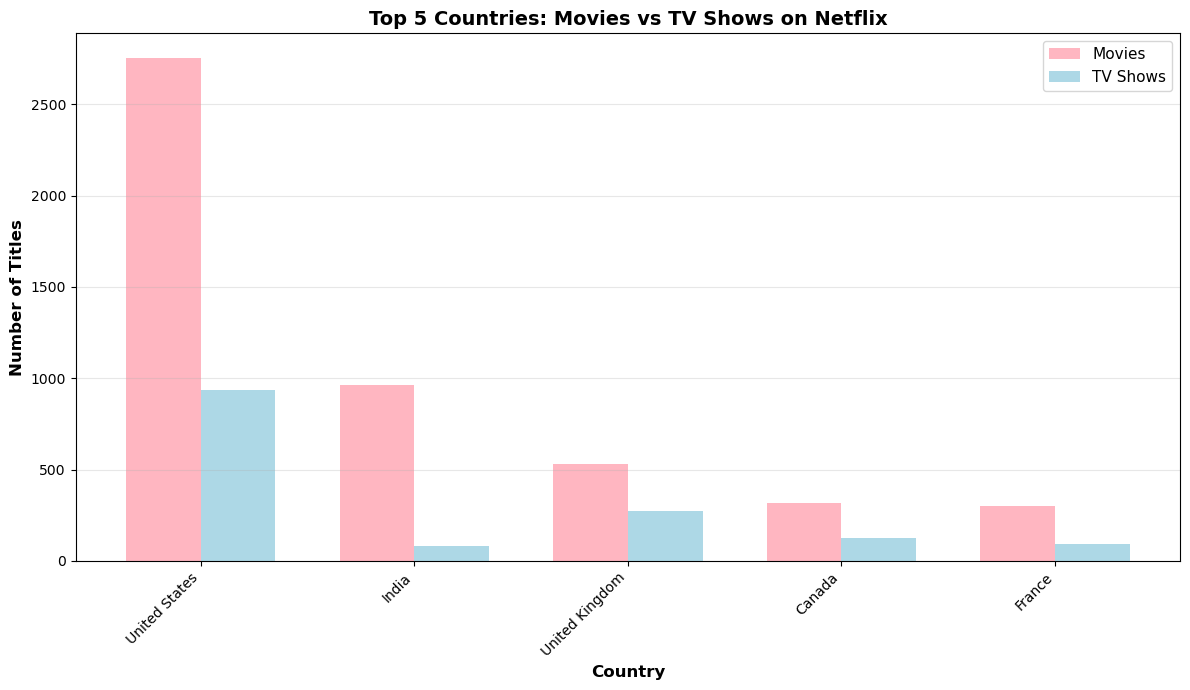

In [51]:
# Set up the bar chart
x = np.arange(len(country_type_counts.index))
width = 0.35
fig, ax = plt.subplots(figsize=(12, 7))
movies = country_type_counts['Movie'].values if 'Movie' in country_type_counts.columns else np.zeros(len(country_type_counts))
tv_shows = country_type_counts['TV Show'].values if 'TV Show' in country_type_counts.columns else np.zeros(len(country_type_counts))
bars1 = ax.bar(x - width/2, movies, width, label='Movies', color='#FFB6C1', linewidth=0.7)
bars2 = ax.bar(x + width/2, tv_shows, width, label='TV Shows', color='#ADD8E6', linewidth=0.7)
ax.set_xlabel('Country', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Titles', fontsize=12, fontweight='bold')
ax.set_title('Top 5 Countries: Movies vs TV Shows on Netflix', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(country_type_counts.index, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()